In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import seaborn as sns
# %matplotlib tk

In [55]:
# data = "../data/ident_wheels_real_indoor.csv"
data = "../data/robot_data.csv"

In [56]:
width, height = (10,10)

In [57]:
df = pd.read_csv(data,header=None, names=['wheel_l','wheel_r','beta_l','beta_r','alpha', 'i', 'j'])

In [58]:
df

,wheel_l,wheel_r,beta_l,beta_r,alpha,i,j
0,4.575942,5.351428,-0.076237,-0.031588,0.000000,1.0,3.0
1,5.860082,7.309856,-0.001716,0.114497,0.000000,1.0,4.0
2,42.154892,43.131904,3.174465,3.258049,0.000000,3.0,7.0
3,10.617283,12.786990,0.145511,0.330269,0.000000,7.0,8.0
4,10.564405,13.211480,0.592314,0.818555,0.000000,9.0,6.0
...,...,...,...,...,...,...,...
720,4.016066,4.652635,-0.003070,0.003009,0.000000,9.0,7.0
721,3.441287,5.106159,-0.007715,0.008970,-0.013772,9.0,5.0
722,3.041545,0.870422,0.012982,-0.012104,0.012968,7.0,4.0
723,8.249753,8.699353,-0.011754,0.011866,0.000000,7.0,2.0


In [59]:
x = df[['i','j']].values
y = df[['beta_l','beta_r','alpha']].values

In [60]:
def generate_grid_plot(width, height, param):
    terrain_matrix = [[[] for j in range(width)] for i in range(height)]
    df.apply(lambda x: terrain_matrix[int(x.i)][int(x.j)].append(x[param]), axis=1)

    min_val = 0
    max_val = 0

    for i in range(height):
        for j in range(width):
            if len(terrain_matrix[i][j]):
                mean = np.mean(terrain_matrix[i][j])
            else:
                mean = 0

            if mean > max_val:
                max_val = mean
            
            if mean < min_val:
                min_val = mean

            terrain_matrix[i][j] = mean

    side = max(abs(min_val), abs(max_val))

    plt.matshow(terrain_matrix, vmin=-side, vmax=side, cmap='bwr')
    plt.title(param)
    plt.colorbar()
    plt.savefig(f'../data/{param}.jpg')
    plt.show()
            

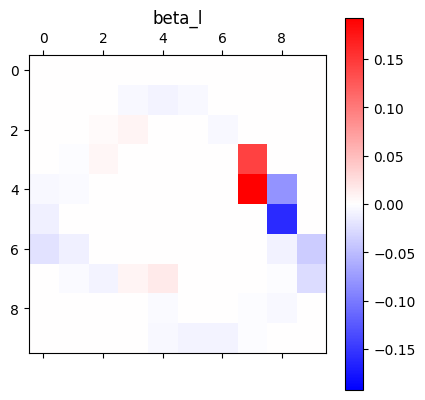

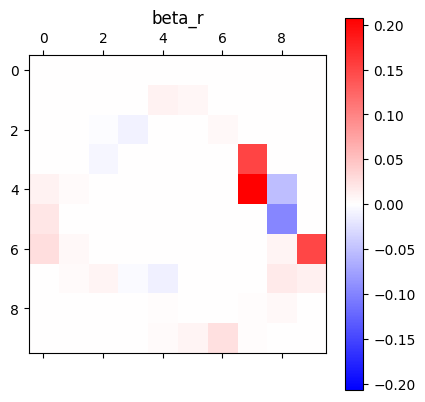

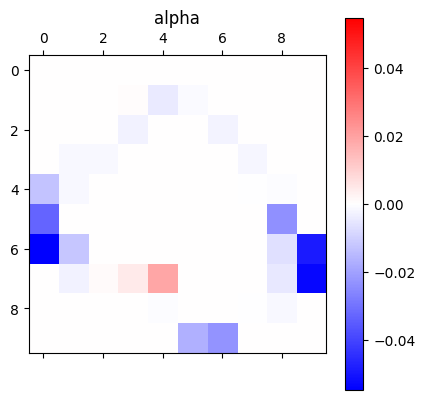

In [61]:
plt.close('all')
generate_grid_plot(width, height, 'beta_l')
generate_grid_plot(width, height, 'beta_r')
generate_grid_plot(width, height, 'alpha')

In [41]:
x = df[['wheel_l','wheel_r']].values
y = df[['beta_l','beta_r','alpha']].values

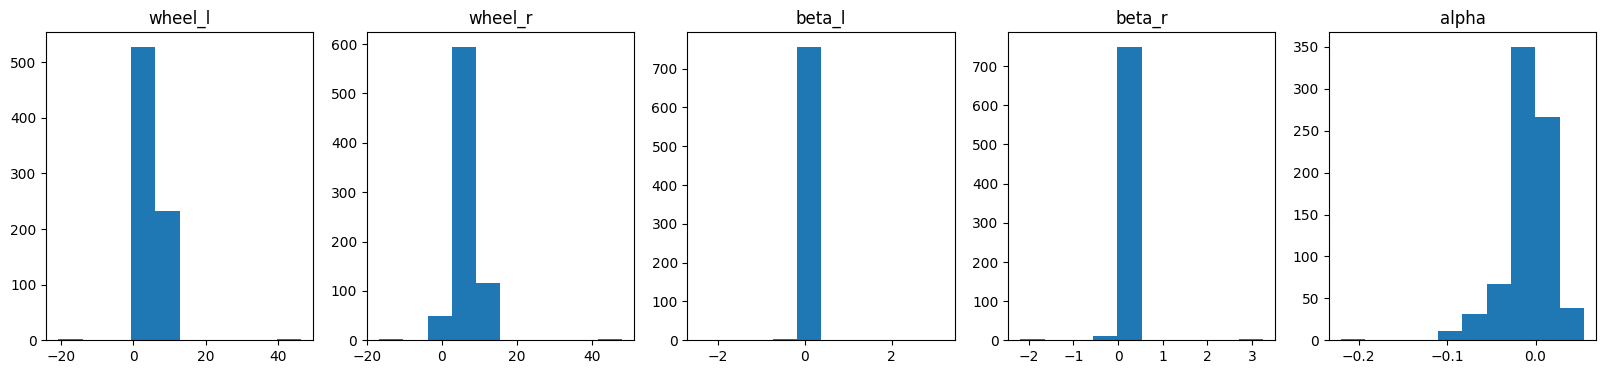

In [42]:
fig, ax = plt.subplots(1, 5, figsize=(20, 4))
ax[0].hist(x[..., 0])
ax[0].set_title('wheel_l')
ax[1].hist(x[..., 1])
ax[1].set_title('wheel_r')
# %% plot histogram to see if output distribution is well behaved, to see if it is neeeded a scaling
ax[2].hist(y[..., 0])
ax[2].set_title('beta_l')
ax[3].hist(y[..., 1])
ax[3].set_title('beta_r')
ax[4].hist(y[..., 2])
ax[4].set_title('alpha')
plt.show()

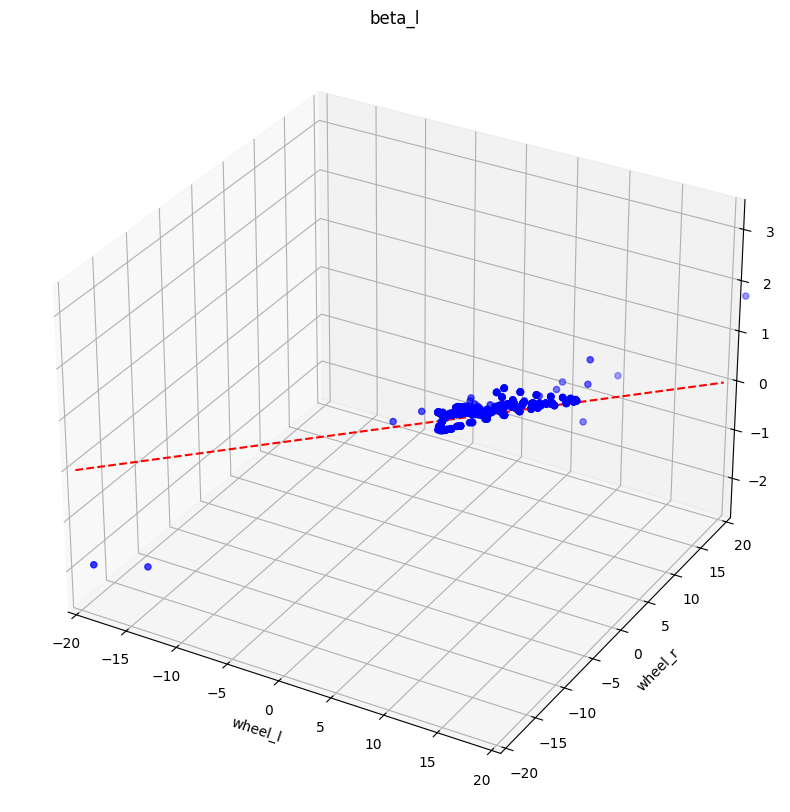

In [43]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.plot([-20,20],[-20,20],[0,0], "--", color="red")
ax.scatter(x[..., 0], x[..., 1], y[..., 0], color='blue')
ax.set_title('beta_l')
ax.set_xlabel('wheel_l')
ax.set_ylabel('wheel_r')
plt.show()

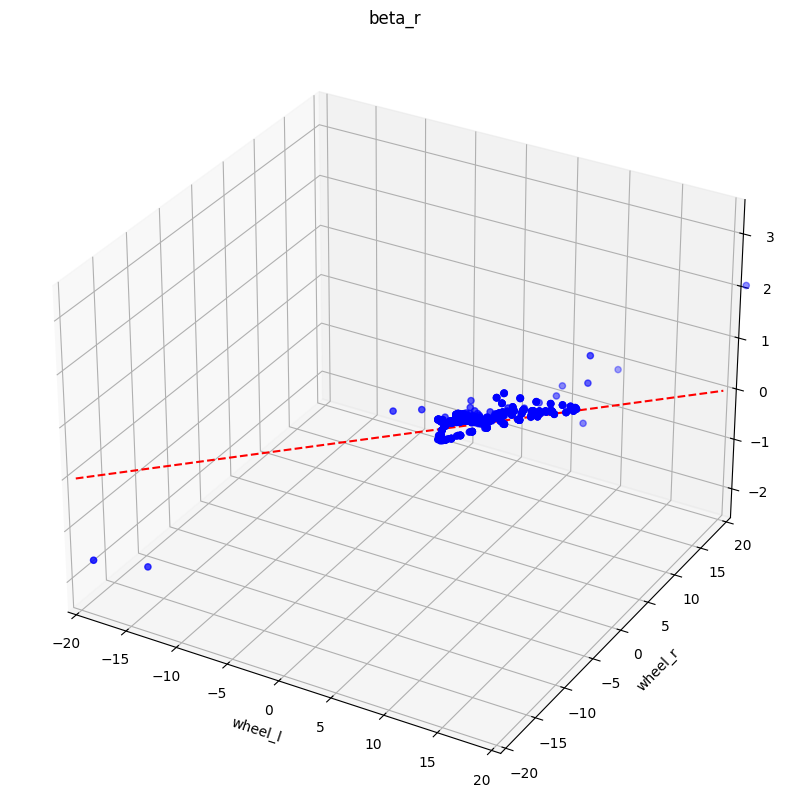

In [44]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.plot([-20,20],[-20,20],[0,0], "--", color="red")
ax.scatter(x[..., 0], x[..., 1], y[..., 1], color='blue')
ax.set_title('beta_r')
ax.set_xlabel('wheel_l')
ax.set_ylabel('wheel_r')
plt.show()

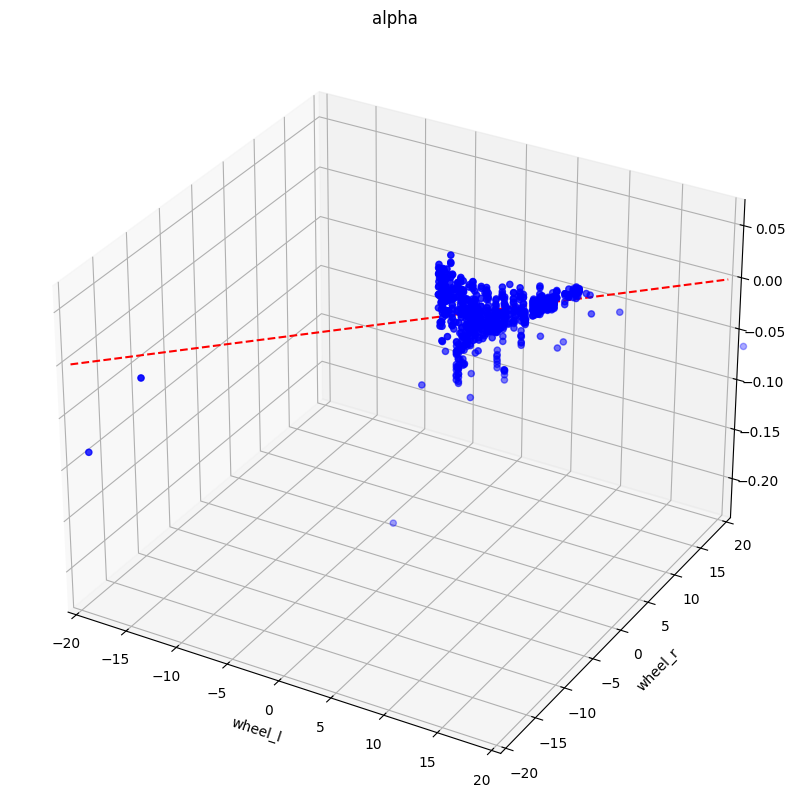

In [45]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.plot([-20,20],[-20,20],[0,0], "--", color="red")
ax.scatter(x[..., 0], x[..., 1], y[..., 2], color='blue')
ax.set_title('alpha')
ax.set_xlabel('wheel_l')
ax.set_ylabel('wheel_r')
plt.show()